<a href="https://colab.research.google.com/github/leandrominer85/Dados-do-Airbnb-Lisboa/blob/main/Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [1]:
#Instalando a versão do plotly (necessário reiniciar o ambiente)
!pip install plotly==5.4.0

     |████████████████████████████████| 25.3 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from plotly import graph_objects as go
import plotly.express as px
import folium
%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
lx = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-10-15/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - bairro de acordo com a classificação geográfica
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço diário para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses
* `license` - número de licença/permissão

In [4]:
lx.head()

id  ...    license
0   6499  ...        NaN
1  25659  ...  56539/AL.
2  29248  ...   23535/AL
3  29396  ...   28737/AL
4  29720  ...   55695/AL

[5 rows x 18 columns]

## Limpeza e transformação dos Dados

### **Primeiramente vou anonimizar os dados retirando as variáveis identificadoras do imóvel/locador**

In [5]:
lx_clean = lx.drop(labels=['name','id','host_id', 'host_name', 'license'], axis=1)

In [6]:
lx_clean.head()

neighbourhood_group  ... number_of_reviews_ltm
0              Lisboa  ...                     4
1              Lisboa  ...                     9
2              Lisboa  ...                    10
3              Lisboa  ...                    34
4              Lisboa  ...                     4

[5 rows x 13 columns]

### **Quero aqui apenas analisar o município de lisboa, não a região tal qual fornecida pelo Airbnb. Como podemos ver há muitos dados referentes a outras cidades e problemas na grafia dos nomes:**

#### [Lista de bairros (freguesisas)](https://pt.wikipedia.org/wiki/Lista_de_freguesias_de_Lisboa)

In [7]:
lx_clean.neighbourhood_group.value_counts()

Lisboa                   13114
Cascais                   1762
Sintra                    1255
Mafra                     1155
Lourinh                    388
Oeiras                     307
Torres Vedras              241
Loures                     136
Amadora                    117
Odivelas                    72
Alenquer                    71
Cadaval                     54
Vila Franca De Xira         52
Sobral De Monte Agrao       21
Azambuja                    10
Arruda Dos Vinhos            6
Name: neighbourhood_group, dtype: int64

In [8]:
lx_clean.neighbourhood.value_counts()

Santa Maria Maior      3089
Misericrdia            2279
Arroios                1655
Cascais e Estoril      1245
Santo Antnio           1043
                       ... 
Santiago dos Velhos       1
Ota                       1
Alguber                   1
Ponte do Rol              1
Meca                      1
Name: neighbourhood, Length: 127, dtype: int64

#### Selecionando apenas a cidade de Lisboa

In [9]:
lx_clean = lx_clean[lx_clean.neighbourhood_group == 'Lisboa']

In [10]:
lx_clean.neighbourhood_group.value_counts()

Lisboa    13114
Name: neighbourhood_group, dtype: int64

#### Formatando os nomes (apenas aqueles com erros)

In [11]:
#Bairros:
lx_clean.neighbourhood.value_counts().index.to_list()

['Santa Maria Maior',
 'Misericrdia',
 'Arroios',
 'Santo Antnio',
 'So Vicente',
 'Estrela',
 'Avenidas Novas',
 'Penha de Frana',
 'Areeiro',
 'Belm',
 'Campo de Ourique',
 'Alcntara',
 'Parque das Naes',
 'Alvalade',
 'Campolide',
 'Olivais',
 'Ajuda',
 'So Domingos de Benfica',
 'Lumiar',
 'Beato',
 'Marvila',
 'Benfica',
 'Carnide',
 'Santa Clara']

In [12]:
dic = {'Misericrdia': 'Misericórdia', 'Santo Antnio' : 'Santo António', 'So Vicente' : 'São Vicente','Penha de Frana' : 'Penha de França', 'Belm' : 'Belém',
 'Alcntara': 'Alcântra','Parque das Naes' : 'Parque das Nações', 'So Domingos de Benfica' : 'São Domingos de Benfica'}
lx_clean['neighbourhood'] = lx_clean['neighbourhood'].map(dic).fillna(lx_clean['neighbourhood'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
lx_clean.neighbourhood.value_counts()

Santa Maria Maior          3089
Misericórdia               2279
Arroios                    1655
Santo António              1043
São Vicente                1042
Estrela                     716
Avenidas Novas              591
Penha de França             409
Areeiro                     273
Belém                       249
Campo de Ourique            237
Alcântra                    226
Parque das Nações           223
Alvalade                    169
Campolide                   164
Olivais                     155
Ajuda                       129
São Domingos de Benfica     116
Lumiar                       94
Beato                        79
Marvila                      71
Benfica                      48
Carnide                      33
Santa Clara                  24
Name: neighbourhood, dtype: int64

### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [14]:
lx_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13114 entries, 0 to 18759
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13114 non-null  object 
 1   neighbourhood                   13114 non-null  object 
 2   latitude                        13114 non-null  float64
 3   longitude                       13114 non-null  float64
 4   room_type                       13114 non-null  object 
 5   price                           13114 non-null  int64  
 6   minimum_nights                  13114 non-null  int64  
 7   number_of_reviews               13114 non-null  int64  
 8   last_review                     11356 non-null  object 
 9   reviews_per_month               11356 non-null  float64
 10  calculated_host_listings_count  13114 non-null  int64  
 11  availability_365                13114 non-null  int64  
 12  number_of_reviews_ltm           

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [15]:
lx_clean.isnull().sum().sort_values(ascending=False)/13114

reviews_per_month                 0.134055
last_review                       0.134055
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
dtype: float64

#### Os dados faltantes se referem a locações sem avaliações (ou novas ou que nunca foram alugadas):

In [16]:
lx_clean[lx_clean.reviews_per_month.isnull()]

neighbourhood_group  ... number_of_reviews_ltm
14                 Lisboa  ...                     0
25                 Lisboa  ...                     0
28                 Lisboa  ...                     0
41                 Lisboa  ...                     0
75                 Lisboa  ...                     0
...                   ...  ...                   ...
18755              Lisboa  ...                     0
18756              Lisboa  ...                     0
18757              Lisboa  ...                     0
18758              Lisboa  ...                     0
18759              Lisboa  ...                     0

[1758 rows x 13 columns]

### **Estatísticas descritivas** 

In [17]:
lx_clean.describe()

latitude     longitude  ...  availability_365  number_of_reviews_ltm
count  13114.000000  13114.000000  ...      13114.000000           13114.000000
mean      38.720469     -9.142925  ...        208.119872               5.680418
std        0.014885      0.017789  ...        127.826143              12.648091
min       38.691930     -9.226790  ...          0.000000               0.000000
25%       38.711240     -9.149647  ...         92.000000               0.000000
50%       38.715510     -9.140725  ...        253.000000               2.000000
75%       38.725710     -9.132713  ...        324.000000               7.000000
max       38.792960     -9.092080  ...        365.000000             820.000000

[8 rows x 9 columns]

### **Qual o tipo de distribuição das variáveis?** 

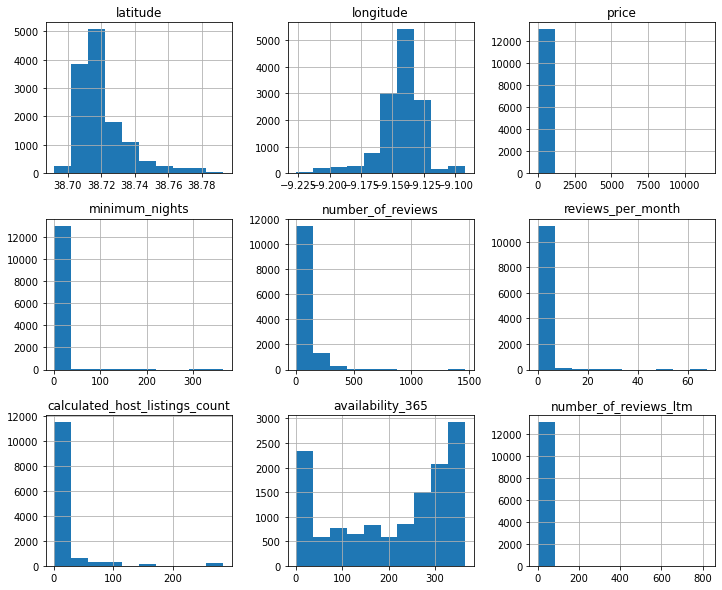

In [18]:
# plotar o histograma das variáveis numéricas
lx_clean.hist(bins=10, figsize=(12,10));

### Boxplots dos dados numéricos sem outliers:

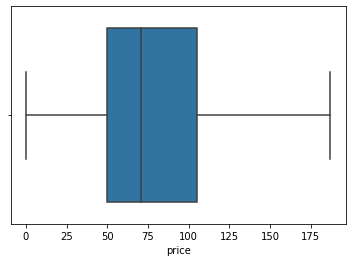

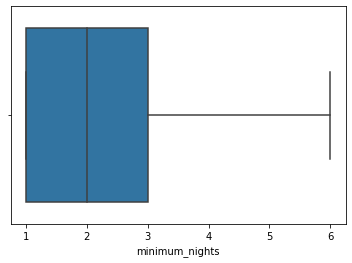

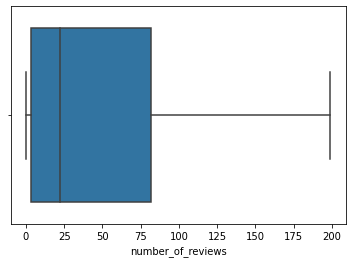

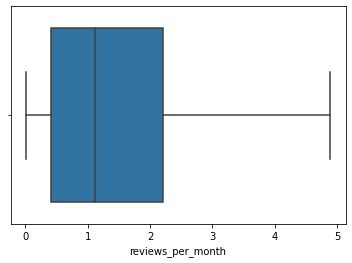

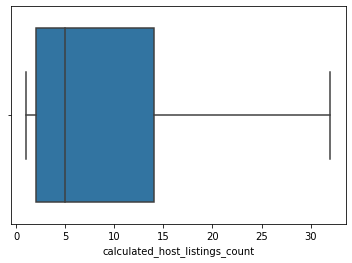

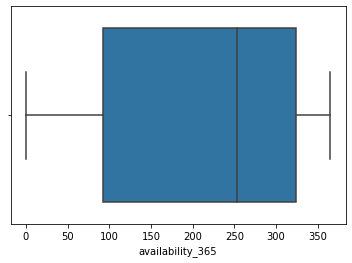

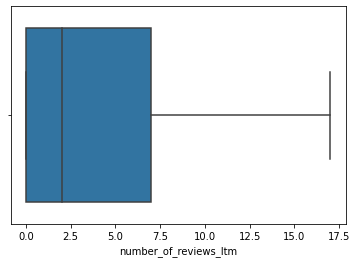

In [19]:
numeric= lx_clean[['price', "minimum_nights","number_of_reviews", "reviews_per_month", "calculated_host_listings_count","availability_365","number_of_reviews_ltm"]]
for column in numeric:
  plt.figure()
  sns.boxplot(x=lx_clean[column], showfliers = False);

### **A variável 'price' tem uma média de EU 98.23. Mas a sua distribuição é afetada por valores outliers:**

In [20]:
lx_clean['price'].describe()

count    13114.00000
mean        98.23616
std        198.07530
min          0.00000
25%         50.00000
50%         71.00000
75%        105.00000
max      11499.00000
Name: price, dtype: float64

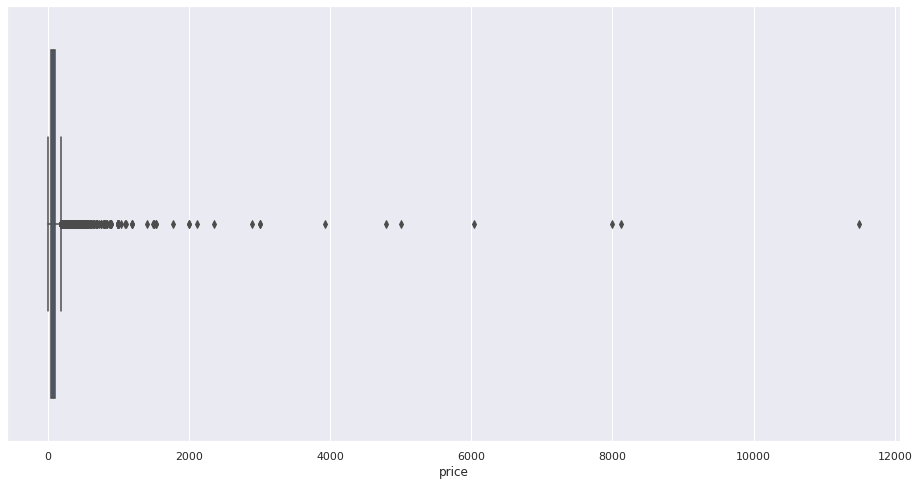

In [21]:
#Boxplot com outliers
sns.set(rc={'figure.figsize':(16,8)})
sns.boxplot(x=lx_clean['price'], );

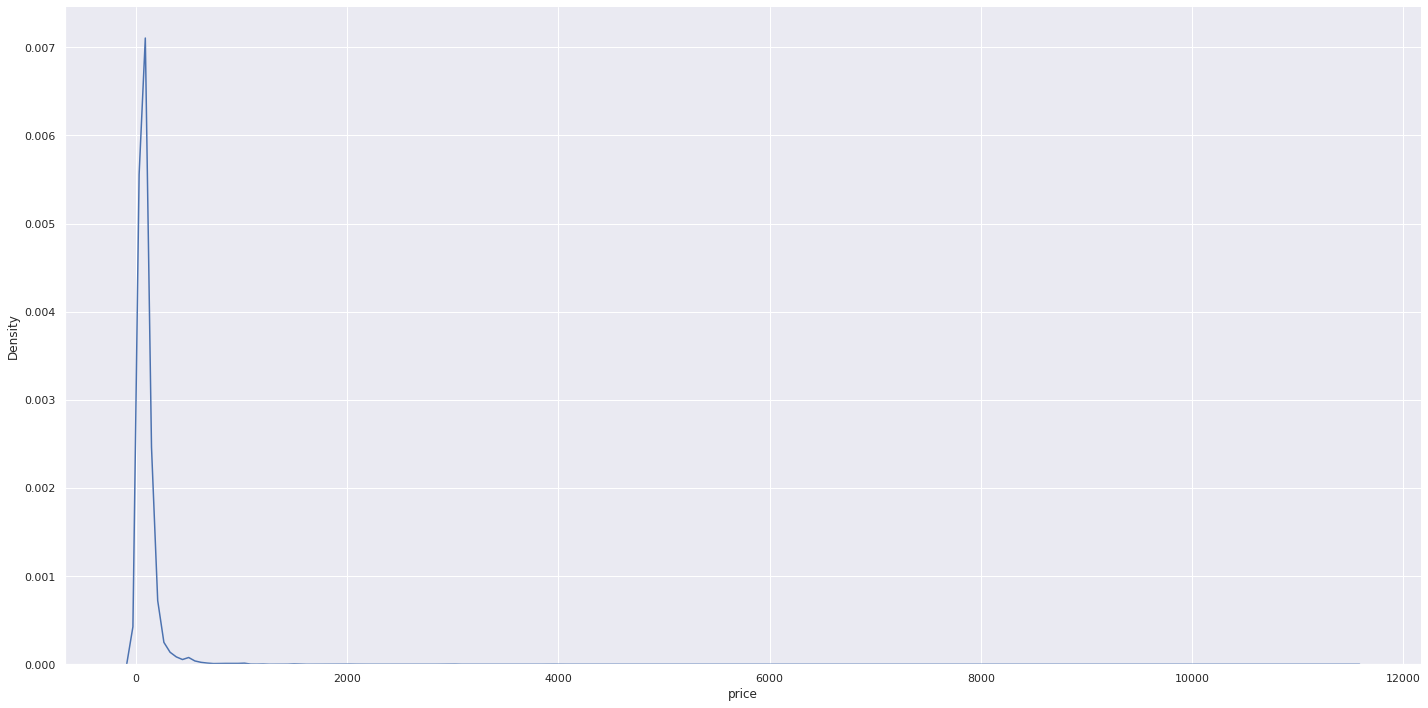

In [22]:
#Distribuição com todos os dados
sns.displot(lx_clean['price'], kind='kde', height=10, aspect=2);

In [23]:
Q1 = lx_clean['price'].quantile(0.25)
Q3 = lx_clean['price'].quantile(0.75)
IQR = Q3 - Q1

price_clean = lx_clean[~((lx_clean['price'] < (Q1 - 1.5 * IQR)) |(lx_clean['price'] > (Q3 + 1.5 * IQR)))]

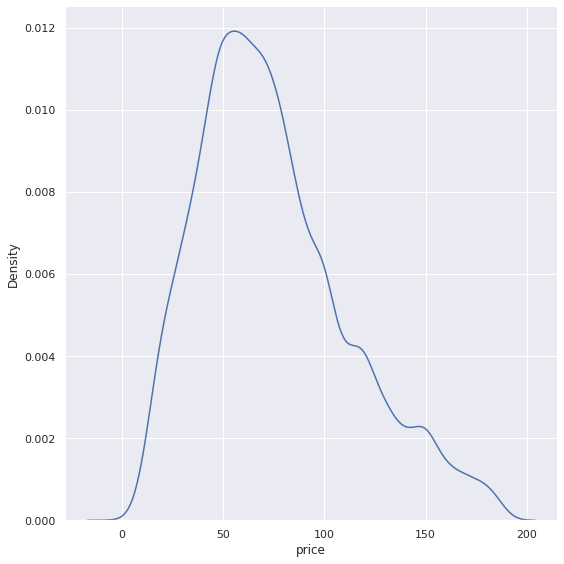

In [24]:
#Distribuição com todos os dados
sns.displot(price_clean['price'], kind='kde', height=8, aspect=1);

### **Qual a correlação existente entre as variáveis?**

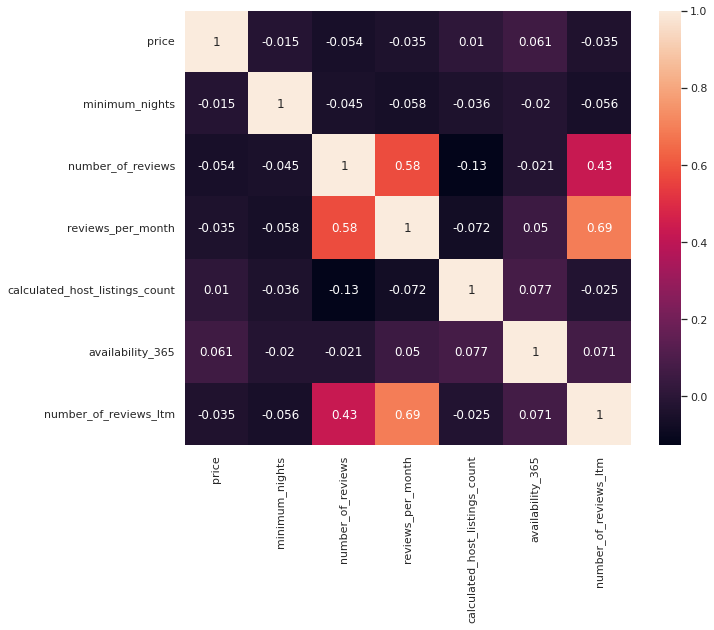

In [25]:
plt.subplots(figsize=(10,8))
corr = numeric.corr()
svm = sns.heatmap(corr, annot=True)


In [26]:
# Correlação com o preço
corr['price'].sort_values()

number_of_reviews                -0.053535
reviews_per_month                -0.034899
number_of_reviews_ltm            -0.034553
minimum_nights                   -0.015245
calculated_host_listings_count    0.009983
availability_365                  0.060851
price                             1.000000
Name: price, dtype: float64

### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [27]:
lx_clean.room_type.value_counts()

Entire home/apt    10109
Private room        2610
Hotel room           235
Shared room          160
Name: room_type, dtype: int64

In [28]:
lx_clean.room_type.value_counts(normalize=True)

Entire home/apt    0.770856
Private room       0.199024
Hotel room         0.017920
Shared room        0.012201
Name: room_type, dtype: float64

### **Qual a localidade com o preço médio mais caro do dataset?**



In [29]:
lx_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Marvila                    224.535211
Parque das Nações          117.852018
Santo António              113.022052
Santa Maria Maior          112.226611
Lumiar                     106.234043
Misericórdia               101.964019
São Domingos de Benfica    100.681034
Estrela                     99.832402
Ajuda                       92.255814
Campo de Ourique            89.725738
Areeiro                     89.699634
Arroios                     89.603021
São Vicente                 89.379079
Benfica                     89.020833
Belém                       80.429719
Campolide                   74.890244
Avenidas Novas              73.460237
Alcântra                    73.097345
Penha de França             72.821516
Beato                       68.721519
Santa Clara                 67.833333
Carnide                     67.181818
Olivais                     66.083871
Alvalade                    65.544379
Name: price, dtype: float64

### **E com a mediana de preços mais alta?**

In [42]:
lx_clean.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

neighbourhood
Parque das Nações          103.0
Santo António               80.0
Santa Maria Maior           80.0
São Domingos de Benfica     79.5
Misericórdia                79.0
Campo de Ourique            75.0
Belém                       70.0
Estrela                     70.0
São Vicente                 69.0
Lumiar                      65.5
Campolide                   65.5
Marvila                     60.0
Arroios                     59.0
Benfica                     58.0
Penha de França             57.0
Alcântra                    56.0
Ajuda                       56.0
Avenidas Novas              55.0
Olivais                     52.0
Areeiro                     52.0
Alvalade                    51.0
Beato                       50.0
Carnide                     50.0
Santa Clara                 23.0
Name: price, dtype: float64

### **Qual é a média do mínimo de noites para aluguel (minimum_nights) por bairro?**

In [30]:
lx_clean.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False)

neighbourhood
Alvalade                   13.000000
Campo de Ourique            7.755274
Carnide                     6.757576
Santa Clara                 6.250000
Campolide                   5.792683
Avenidas Novas              5.695431
Penha de França             5.090465
Alcântra                    4.778761
Santo António               4.727709
Lumiar                      4.680851
Parque das Nações           4.609865
Olivais                     4.406452
Belém                       4.369478
Arroios                     4.283384
Beato                       3.987342
Benfica                     3.583333
Marvila                     3.436620
São Domingos de Benfica     3.370690
São Vicente                 3.204415
Areeiro                     3.168498
Misericórdia                3.167617
Estrela                     2.928771
Santa Maria Maior           2.737779
Ajuda                       2.565891
Name: minimum_nights, dtype: float64

### **Quantos imóveis estão disponíveis por bairro?**


In [41]:
lx_clean.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)

neighbourhood
Santa Maria Maior          3089
Misericórdia               2279
Arroios                    1655
Santo António              1043
São Vicente                1042
Estrela                     716
Avenidas Novas              591
Penha de França             409
Areeiro                     273
Belém                       249
Campo de Ourique            237
Alcântra                    226
Parque das Nações           223
Alvalade                    169
Campolide                   164
Olivais                     155
Ajuda                       129
São Domingos de Benfica     116
Lumiar                       94
Beato                        79
Marvila                      71
Benfica                      48
Carnide                      33
Santa Clara                  24
Name: neighbourhood, dtype: int64

### **Qual a distribuição espacial dos dados?**

In [32]:
# importando o arquivo com os dados georeferrenciados (http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-10-15/visualisations/neighbourhoods.geojson)
geo =  json.load(open("/content/neighbourhoods.geojson", "r"))

In [33]:
#Novo dataset para plotagem
lx_map = lx[lx.neighbourhood_group == 'Lisboa']

In [34]:
#Outro dataset para plotagem
lx_map_2 = lx_map.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

In [35]:
lx_map_2

neighbourhood
Marvila                   224.535211
Parque das Naes           117.852018
Santo Antnio              113.022052
Santa Maria Maior         112.226611
Lumiar                    106.234043
Misericrdia               101.964019
So Domingos de Benfica    100.681034
Estrela                    99.832402
Ajuda                      92.255814
Campo de Ourique           89.725738
Areeiro                    89.699634
Arroios                    89.603021
So Vicente                 89.379079
Benfica                    89.020833
Belm                       80.429719
Campolide                  74.890244
Avenidas Novas             73.460237
Alcntara                   73.097345
Penha de Frana             72.821516
Beato                      68.721519
Santa Clara                67.833333
Carnide                    67.181818
Olivais                    66.083871
Alvalade                   65.544379
Name: price, dtype: float64

### **Mapa de distribuição dos imóveis em Lisboa**

In [36]:
fig = px.scatter_mapbox(lx_map, lat="latitude", lon="longitude", hover_name="neighbourhood", hover_data=["price"],
                        color_discrete_sequence=["blue"], zoom=3, height=300, title='Mapa de distribuição dos imóveis em Lisboa')
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 10, #Zoom in scale
    mapbox_center = {"lat": lx_map['latitude'].mean(), "lon": lx_map['longitude'].mean()}, #Center location of the map
width=1200, height=800)
fig.show()

### **Mapa de preços médios por bairro de Lisboa**

In [37]:
#https://medium.com/geekculture/three-ways-to-plot-choropleth-map-using-python-f53799a3e623
#Create figure object
fig = go.Figure(
    go.Choroplethmapbox(
        geojson = geo, #Assign geojson file
        featureidkey = "properties.neighbourhood", #Assign feature key
        locations = lx_map_2.index, #Assign location data
        z = lx_map_2, #Assign information data
        zauto = True,
        colorscale = 'viridis',
        showscale = True
    )
)

#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 10, #Zoom in scale
    mapbox_center = {"lat": lx_map['latitude'].mean(), "lon": lx_map['longitude'].mean()}, #Center location of the map
width=1200, height=800, title='Mapa de preços médios por bairro de Lisboa (€)')

## Conclusões


Essa foi uma análise preliminar dos dados do Airbnb de Lisboa para 20 de Dezembro de 2020.
Os dados aqui utilizados provêm de um dataset simplificado, assim as conclusões aqui apresentadas seriam mais ricas com a adição de novos dados. A criação e um modelo de machine learning também seria beneficiada disso (vide as correlações entre as variáveis e o preço são muito fracas.
Dito isso, podemos retirar as seguintes conclusões:


*   A variável preço tem grande dispersão, apresentando outliers acima do quadrante superior.
*   A presença desses outliers influencia a média de estadia por bairros (notadamente em Marvila).
*   Isso faz com que tenhamos os seguintes bairros com maiores preços de acordo com a média e a mediana:

Média              | Mediana
---------          | ------
Marvila            | Parque das Nações
Parque das Nações  | Santo Antônio     
Santo António      | Santa Maria Maior       
Santa Maria Maior  | São Domingos de Benfica       
Lumiar             | Misericórdia

* A média de estadia mínima por noites varia muito: entre 2.5 e 13
* Há presença de imóveis por toda a cidade, mas a média de preço dos mesmos não é homogênea.

